In [372]:
import matplotlib as mpl
import numpy as np
import scipy 
import pickle
import pylab as plt
import copy
import pandas as pd
from pathlib import Path
%matplotlib inline
import csv   

In [373]:
# Load in the files
f=open("./MCEqFluxMeshes.pkl","rb")
EBins, cosas, bs, FluxMeshes= pickle.load(f)
f.close()

f=open("./LinInterps.pkl","rb")
LinInterps=pickle.load(f)
f.close()

LinInterps.keys()

dict_keys([100, 300, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000, 2000, 4000, 6000])

In [374]:
eps=0.01
survivalfractions=[]
correctedmeshes=[]

for ei in range(0,len(EBins)-2):
    
    mesh=copy.copy(FluxMeshes[ei])
    survmesh=np.zeros_like(mesh)
    
    for ica in range(len(cosas)):
    
        for ib in range(len(bs)):
            surv=LinInterps[EBins[ei]](cosas[ica]+eps,bs[ib])
            survmesh[ica,ib]=surv
            mesh[ica,ib]=mesh[ica,ib]*surv
    
    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)

In [375]:
intensity = []
beta      = []
alpha     = []

cosa_mesh, b_mesh=np.meshgrid(cosas, bs)
alpha_=np.arccos(cosas-4e-16) # 4e-16 factor introduced to remove erroneous cosas > 1

totalflux=np.zeros_like(correctedmeshes[0])
for m in correctedmeshes:
    totalflux+=m

# Loop over the flux bins and get alpha and beta values to save to file
for y in range(0, len(totalflux)):
    for x in range(0, len(totalflux[y])):
        intensity.append(totalflux[y][x])
        beta.append(bs[x]+np.pi)
        alpha.append(alpha_[y])

# Create a dictionary of the intensity, alpha and beta values to store
dict_ = {'Intensity':intensity, 'beta': beta, 'alpha': alpha}

# Dataframe from the dictionary
dataframe = pd.DataFrame(dict_)

# Write the data from hdf5 format to csv for reading into nexus
filepath = Path('SimulatedMuonsFromProposal.csv')  
dataframe.to_csv(filepath, index = False, header = False)  

# Save the bin edges to the file too

# Bin edges, add the tiny numbers to remove bin artifacts
binEdges_beta = np.linspace(0, 2*np.pi-1e-10,30)

binEdges_alpha = np.linspace(0.4, 1-1e-10, 31)
binEdges_alpha = binEdges_alpha[::-1]
binEdges_alpha = np.arccos(binEdges_alpha)


with open(r'SimulatedMuonsFromProposal.csv', 'a') as f:
    writer = csv.writer(f)
    
    # Write the alpha bin edges
    for i in range(len(binEdges_alpha)):
        writer.writerow(['alpha', binEdges_alpha[i]])

    # Write the alpha bin edges
    for i in range(len(binEdges_beta)):
        writer.writerow(['beta',binEdges_beta[i]])



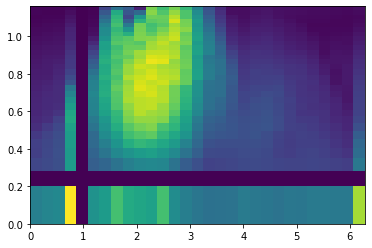

In [376]:
# Plot the histogram
h, xedges, yedges, image = hist_data= plt.hist2d(dataframe["beta"], dataframe["alpha"], weights=dataframe["Intensity"], bins=[binEdges_beta, binEdges_alpha]) 

# Get the bin smear edges

In [377]:
smears = []

# Get the smear vector for the zenith
for indx in range(0, len(alpha_)-1):
    smears.append( -1*(alpha_[indx+1] - alpha_[indx]))

smears = smears[::-1]
print(smears)

[0.20033484232311913, 0.08345926688520847, 0.06437191206463311, 0.05454982030770078, 0.04831097021560088, 0.04390731454463315, 0.04059252797349233, 0.037986450108708936, 0.03587220360769827, 0.034115800762489434, 0.03262940076737708, 0.03135270221868158, 0.030242756673905857, 0.029268039408617774, 0.028404822322277035, 0.027634861950832423, 0.026943873789830985, 0.026320495243533637, 0.02575556242418431, 0.025241594409087353, 0.02477241812103337, 0.024342890671188888, 0.023948690601140354, 0.023586158703977844, 0.0232521750976451, 0.022944063193710784, 0.022659513885635807, 0.02239652512312884, 0.022153353325937486, 0.021928474002397946]
